<a href="https://colab.research.google.com/github/ymann/CIS700-Deep-Learning/blob/master/HW0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Getting Started (5 pts)

## Course Policies (0 pts)



**Collaboration Policy**

All of the homework assignments besides the final project are to be done **individually**. You may collaborate with others on a high level, however, all LaTeX and code must be done individually. Students who have been shown to be violating this policy will automatically receive a 0 for the assignment and be referred to the Office of Student Conduct. By submitting an assignment you agree that the work produced is your work and your work **only**.

**Late Policy**

This class will penalize late submission by 20% for each day past the submission deadline. There are no late days in this class.


## Python Resources (0 pts)

Welcome to CIS 700-004: Deep Learning for Data Science! 

HW0 will serve as an introduction / setting up for many of the technologies we'll be using in the course. Additionally, there is a written component where you will review key concepts used in deep learning.

## Setting up Google Colab (0 pts)

**Opening on Google Colab** (for those viewing this notebook remotely)

Every homework assignment will be released on canvas as a jupyter notebook file. Although you can develop python notebooks locally, we will be expecting you to develop on Google Colab, which you can access on (https://colab.research.google.com). 

Once you have logged in, you'll be taken to a "Hello, Colaboratory page". To upload this notebook and view, simply click file->upload notebook and choose this notebook file.

** Getting familiar with Google Colab / Jupyter **

We highly recommend that you read the first section "[Overview of Colaboratory](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)" if you aren't already familiar with Google Colab / Jupyter notebooks to get a synopsis of these technologies. For further reading on Jupyter notebooks, view the following resources:

*   https://www.dataquest.io/blog/jupyter-notebook-tutorial/
*   https://medium.com/codingthesmartway-com-blog/getting-started-with-jupyter-notebook-for-python-4e7082bd5d46 (skip the beginning on setting up Jupyter)

To upload this notebook, simply click file->upload notebook and choose this python notebook file.

**Version Control**

Google Colab automatically provides version control (see file->revision history), however, this revision history tends to provide no more than a few hours of version control automatically. If you are using Google Colab solely for version control, we recommend that you hit file->save and pin revision (i.e. whenever you would normally commit in Github) every so often so that the version doesn't get deleted from the history.

Alternatively, Google Colab provides Github support, so for those that are more familiar with this version control system we recommend following [this](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb#scrollTo=Rmai0dD30XzL) tutorial.





## Setting up the Assignment (5 pts)

For all future homeworks, the Jupyter notebook file we provide will be very sparse, usually only with one line (as seen below) to clone the cis 700 repository which will follow this general structure (however, this may be subject to change):

    CIS700-004/ 
        hw0/ 
           helper.py (helper methods if necessary)
           dataset (for some assignments, not hw0)
           writeup.pdf
           template.tex (LaTeX template for writeup)
        hw1/
        ...




In [0]:
!git clone https://github.com/cis700/hw0-updated.git

Cloning into 'hw0-updated'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


Click "files" and "refresh", and you should see on the left the directory structure we specified above (without the dataset). As stated earlier, for future homeworks the writeup will contain most of the instructions for the assignment (rather than this notebook), but for now it contains a few theory problems.


**Installing Dependencies**
Besides cloning the repo, we will also include in the notebook a code snippet to download many of the packages required for the homework assignment. However, feel free to install other packages (for instance, using [pip](https://pip.pypa.io/en/stable/), which comes pre-installed in colab). Run the code snippet below to install matplotlib (don't worry if it says it's already satisfied).

In [0]:
!pip install matplotlib

For those that have not used Python before, we strongly recommend reading / completing a few tutorials on Python to get yourselves familiarized with the language. Here is a list of a few such resources:



*   https://www.w3schools.com/python/python_intro.asp
*   https://www.learnpython.org/
*   https://www.udemy.com/pythonforbeginnersintro/




**Setting up the GPU **

First, go to Runtime->Change Runtime Type, and change Hardware Accelerator to **GPU**. Doing so changes the runtime (think of it as connecting to a completely different instance now). Therefore, you have to re-install all previously installed packages, and all previous workspace variables have been deleted. Since at this point we haven't installed any new packages or created any new workspace variables, we haven't lost anything.

Next, run the code snippet below.

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/' 
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

# http://pytorch.org/ 
from os.path import exists 
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag 
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag()) 
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/' 
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'  
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print(device)

tcmalloc: large alloc 1073750016 bytes == 0x58ffe000 @  0x7f6f3c0252a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
fastai 1.0.41 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
Operation cancelled by user


KeyboardInterrupt: ignored

The above should print "cuda:0", otherwise revisit the steps above or come to office hours to get further help.

In [0]:
import numpy as np
import torch

x = torch.FloatTensor([1,2,3])
print(x)
x = x.to(device)
print(x)

To send a variable to the GPU (represented by the variable device), simply follow the above. As you can see, after x is sent to the device, it is clearly denoted as a property of the tensor itself.

**Using PDB to debug**

Although not necessary, PDB can serve as a very powerful debugging tool. For those already familiar with GDB, PDB is a very similar such tool. Below is a faulty function, follow these steps (using PDB) to figure out what the bug is.

In [0]:
import pdb

## Function should return a^b, e.g. pow(2,3) should return 8.
def buggy_pow(a, b):
  prod = 1
  for i in range(0, b):
    prod = prod * a
  return prod

pdb.set_trace()
print(buggy_pow(2,3))
  

--Return--
> <ipython-input-26-cc613e3ae70f>(10)<module>()->None
-> pdb.set_trace()
(Pdb) buggy_pow(2,3)
8
--KeyboardInterrupt--
(Pdb) exit


BdbQuit: ignored

To start a PDB session, simply use the function "pdb.set_trace()".

Type the following commands (in this order) to debug the function:
*   b 7 (sets breakpoint)
*   c (continues until breakpoint)
*   p prod (prints proceeding variable)
*   c
*   p prod
*   c
*   p prod
*   exit

**Q1**: Do you notice anything about the variable prod? In your writeup (using the template we provided), detail your findings as well as the fix to the above function to get credit for this section.

Once you've exited the program, hover over the icon in the top left of the output (should turn into an X), and click it to clear the output.



---


# Classical Machine Learning Review (55 pts)
This section will serve as a refresher for concepts you have learned in previous machine learning classes. In this section, you will be working with the IRIS dataset, which contains key properties about different species of irises.

Using classical machine learning techniques you will classify which iris each data sample belongs to.

## Installing Dependencies (0 pts)

Determine what dependencies you need to use and instantiate them in this code snippet as you go. If you are hesitant about including a package, please post on Piazza.

In [0]:
from sklearn import datasets
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn.model_selection import ShuffleSplit


## Exploratory Data Analysis (30 pts)

In this section you will explore the dataset before you actually build the models to train.

**Load data**

Figure out how to use sklearn to load the iris dataset (Google is encouraged)

Answer the following questions in your writeup:

**Q2 (3 pts):** How many different types of irises are in the dataset?

**Q3 (3 pts):** What are all the features given in the dataset?

In [0]:
iris = datasets.load_iris()

**Visualizing the Data**

Use Matplotlib to plot the samples with the sepal width, petal length, and petal width serving as the x,y,z dimensions respectively. 
Color each class a different color. Be sure to include a title, label each axis and include a legend.

**Q4a (10 pts):** Include the plot in the writeup

**Q4b (4 pts):** What observations can you make about the plot?

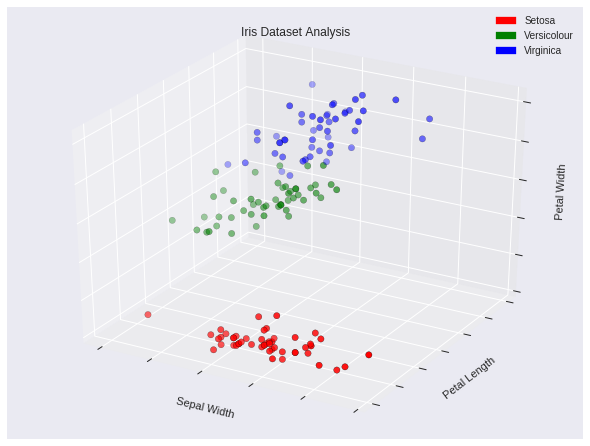

In [3]:
X = iris.data[:, 1:4]
y = iris.target
colors = ['red','green','blue']
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, )
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=matplotlib.colors.ListedColormap(colors), edgecolor='k', s=40)
ax.set_title("Iris Dataset Analysis")
ax.set_xlabel("Sepal Width")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Petal Length")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Width")
ax.w_zaxis.set_ticklabels([])
red_patch = mpatches.Patch(color='red', label='Setosa')
orange_patch = mpatches.Patch(color='green', label='Versicolour')
gray_patch = mpatches.Patch(color='blue', label='Virginica')
plt.legend(handles=[red_patch, orange_patch, gray_patch])



**Analyzing the Data**

For each type of plant in the train set, use Panda and NumPy to compute the mean of each of the features, and report what these 
means are in a table. For those not familiar with numpy and/or panda, here are a few helpful resources to get introduced:'

*   https://machinelearningmastery.com/introduction-to-tensors-for-machine-learning/ 
*   https://github.com/rougier/numpy-tutorial


**Q5a (7 pts):** Include the final table in the writeup.

**Q5b (3 pts):** What observations can you make about the reported means?




In [4]:
X = iris.data
X.shape
setosa = X[y==0]
versicolour = X[y==1]
virginica = X[y==2]
s = [np.sum(setosa[:,0])/50, np.sum(setosa[:,1])/50, np.sum(setosa[:,2])/50, np.sum(setosa[:,3])/50]
ve = [np.sum(versicolour[:,0])/50, np.sum(versicolour[:,1])/50, np.sum(versicolour[:,2])/50, np.sum(versicolour[:,3])/50]
vi = [np.sum(virginica[:,0])/50, np.sum(virginica[:,1])/50, np.sum(virginica[:,2])/50, np.sum(virginica[:,3])/50]
A = np.array((s,ve,vi),dtype=float)
df = pd.DataFrame(A)
df = df.transpose()
df.columns = ['setosa','versicolour','virginica']
df

,setosa,versicolour,virginica
0,5.006,5.936,6.588
1,3.428,2.770,2.974
2,1.462,4.260,5.552
3,0.246,1.326,2.026


**Splitting Dataset**

Use sklearn to do a 60-20-20 split of the dataset into train, evaluation and test sets. 



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## Building Models (25 pts)

**Models - KNN**

Use sklearn's built in KNN method to classify samples. 

**Q6a (5pts):** Report the final test / train accuracy.

In [6]:
max_score = 0
best_k = 0

for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  score = knn.score(X_val,y_val)
  best_k = k if score > max_score else best_k
  max_score = score if score > max_score else max_score

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
score = knn.score(X_test,y_test)
score
train_score = knn.score(X_train,y_train)
train_score

0.9777777777777777

**Models - Logistic Regression**

Now use logistic regression instead, also plotting accuracy over iterations.

**Q6b (5 pts):** Report the final test / train accuracy

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9333333333333333
0.9444444444444444


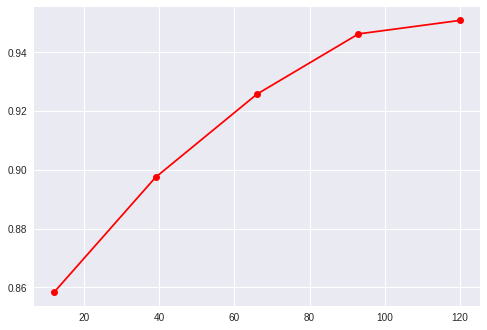

In [8]:
best_c = 0
max_score = 0

for c in range(-4,4):
  if c==0:
    continue
  model = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=0, penalty="l2", C=(10**(c)))
  model.fit(X_train,y_train)
  score = model.score(X_val,y_val)
  best_c = c if score > max_score else best_c
  max_score = score if score > max_score else max_score

cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=0)
X = iris.data
y = iris.target
model = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=0, penalty="l2", C=(10**(best_c)))
model.fit(X_train,y_train)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# print(test_scores_mean)
# print(train_scores_mean)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

**Models - Decision Tree**

Finally, use decision trees and plot accuracy over iterations.

**Q6c (5 pts):** Report the final test / train accuracy

[0.33333333 0.33333333 0.66666667 0.92       0.96      ]
[1. 1. 1. 1. 1.]
0.9666666666666667
1.0


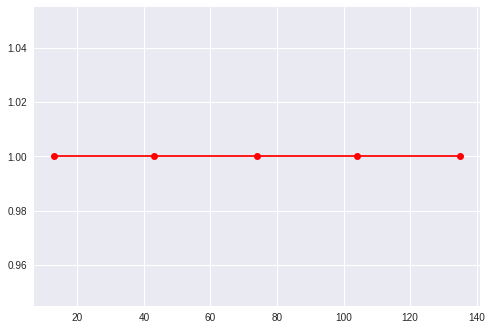

In [0]:
best_d = 0
max_score = 0

for d in range(1,30):
  model = tree.DecisionTreeClassifier(max_depth=d)
  model.fit(X_train,y_train)
  score = model.score(X_val,y_val)
  best_d = d if score > max_score else best_d
  max_score = score if score > max_score else max_score

X = iris.data
y = iris.target
model = tree.DecisionTreeClassifier(max_depth=d)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
print(test_scores_mean)
print(train_scores_mean)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

**Model Evaluation**

**Q6d (10 pts):** Now that you've used three different classical ML techniques for classifying the samples, which one performs the best? Based on your observations of the dataset, why do you think this one performs the best and the other ones perform poorly?